# O *quantum* de condutância

Continuando a série de textos sobre eletrônica, o texto de hoje aborda a quantização da condutância elétrica ($G$). Talvez condutância seja uma palavra estranha para você, mas com certeza já ouviu falar de resistência elétrica ($R$). Uma é exatamente o inverso da outra:
\begin{equation*}
G = \frac1R.
\end{equation*}
A condutância permite sabermos o quanto de corrente elétrica ($I$) é possível passar por um material condutor ao aplicar uma voltagem ($V$) usando a famosa lei de Ohm:
\begin{equation*}
I = GV.
\end{equation*}

Num fio de proporções "normais", ou seja, em fios elétricos como o cabo da sua TV e o carregador do celular, vários elétrons passam por uma seção transversal do fio ao mesmo tempo. Por outro lado, conforme vamos diminuindo o tamanho do fio, conforme discuti no post sobre [confinamento eletrônico](../confinamento_eletronico/), apenas um número pequeno de elétrons "cabe" dentro dessa região, e é possível inclusive contar quantos elétrons podem passar ao mesmo tempo usando a fórmula de Landauer.

## A fórmula de Landauer

A fórmula funciona de um jeito bem simples: se pegarmos um nanofio ideal (que os átomos estão perfeitamente organizados, de forma que os elétrons podem se propagar sem encontrar nenhuma irregularidade no caminho), a condutância é proporcional ao número de elétrons ($N$) que podem passar ao mesmo tempo por uma seção transversal do fio:
\begin{equation*}
G = N \frac{e^2}{h},
\end{equation*}
em que $e$ é a carga do elétron e $h$ é a constante de Planck.

Vamos mostrar isso na prática (tá, não exatamente na prática, mas com uma simulação). Consideremos um nanofio com 10 átomos de largura. Isso significa que exitem 10 canais pelos quais podemos transportar elétrons.

In [1]:
import wire
import kwant
import numpy as np
from adaptive import notebook_extension, Runner, Learner1D
notebook_extension()
from functools import partial

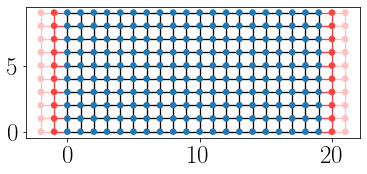

In [2]:
sys = wire.create_sys()
kwant.plot(sys);

**Figura 1:** Esquema do nanofio usado nas simulações. Estamos simulando um nanofio com 10 átomos de largura (direção vertical) e infinito ao longo da direção horizontal (representado pelos pontos vermelhos).

Podemos, então, popular e despopular cada um dos canais de transmissão desses elétrons com uma voltagem entre as duas extremidades do nanofio. E vemos que, a cada vez que populamos um desses canais, a condutância salta em $e^2/h$, até atingir o valor máximo de $10 e^2 / h$, significando que 10 canais eletrônicos foram populados.

In [3]:
learner = Learner1D(
    partial(wire.compute_conductance, sys = sys),
    bounds=(0, 4)
)
runner = Runner(learner, goal=lambda l: l.npoints > 100)
runner.live_info()

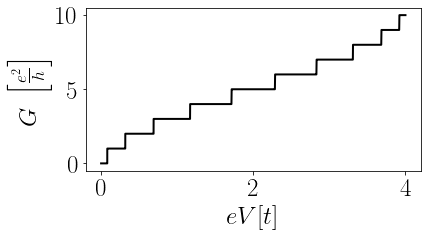

In [4]:
data = learner.data
Es_0, Gs_0 = map(list, zip(*sorted(data.items())))
wire.plot_cond(Es_0, Gs_0)

**Figura 2:** Condutância do nanofio mostrado na Figura 1. É possível observar os 10 degraus múltiplos de $e^2 / h$.

É claro que o mundo real é bem mais complicado: é muito difícil produzir em laboratório um nanofio perfeito: precisamos levar em conta os efeitos de desordem. Por exemplo, as vezes tipos diferentes de átomos trocam de lugar, ou até átomos que nem deveriam estar no nanofio ficam presos no processo de fabricação; é possível também que os átomos saiam levemente da posição esperada; quando colocamos o nanofio em cima de um substrato, eles podem interagir de uma forma inesperada; e por aí vai. Quando adicionamos algum tipo de desordem, a fórmula de Landauer fica mais complicada, e não é mais possível, como você pode ver na figura abaixo, em vermelho, determinar exatamete quantos canais eletrônicos estão populados e para qual energia ocorre a população de cada canal.

In [5]:
learner = Learner1D(
    partial(wire.compute_conductance, sys = sys, U_0 = 1.0),
    bounds=(0, 4)
)
runner = Runner(learner, goal=lambda l: l.npoints > 200)
runner.live_info()

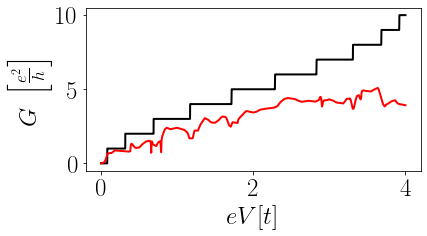

In [6]:
data = learner.data
Es, Gs = map(list, zip(*sorted(data.items())))
    
wire.plot_cond(par = Es_0, Gs = Gs_0, par2 = Es, Gs2 = Gs)

**Figura 3:** Condutância do nanofio mostrado na Figura 1. Em preto, o resultado da Figura 2 é replicado. Em vermelho, vemos o efeito de adicionar desordem na região em azul da Figura 1.

Mas existem sistemas na natureza que funcionam como nanofios perfeitos. Discutiremos um caso particular chamado efeito Hall quântico.

## O efeito Hall

### A versão clássica

Como o nome sugere, o efeito Hall quântico é uma manifestação quântica de sua contraparte clássica, denominada simplesmente efeito Hall. Então vamos explicar brevemente a versão clássica antes de continuar: se tentarmos fazer uma corrente passar por um material condutor (ou seja, injetar elétrons com uma velocidade $\mathbf{v}$), e ao mesmo tempo aplicarmos um campo magnético $\mathbf{B}$ perpendicular a essa corrente, os elétrons que se propagam no material são defletidos para um dos lados da amostra, uma consequência direta da força de Lorentz
\begin{equation*}
\mathbf{F} = e\mathbf{v} \times \mathbf{B}.
\end{equation*}
Podemos checar esse fenômeno medindo a condutância entre entre as duas laterais da amostra, a chamada condutância Hall ($G_H$). Vou poupar vocês de contas: o resultado é
\begin{equation}
G_E = \frac{ne}{B},
\end{equation}
em que $n$ é a densidade de elétrons do material.

![classic](./classic_Hall.png)

**Figura 4:** Esquema do experimento do efeito Hall clássico. Elétrons na presence de um campo magnético são defletidos pela força de Lorentz. Os elétrons se acumulam em uma das paredes da amostra, levando a um valor não nulo da condutância Hall.

A expressão acima mostra que a condutância é **inversamente proporcional** ao campo magnético $B$, ou seja, se aumentarmos o suficiente o campo magnético a condutância deve diminuir. Mas será que podemos dimiuir essa condutância arbitrariamente próximos de zero? A resposta é não. E o resultado é o efeito Hall quântico.

### Efeito Hall quântico

Elétrons em um condutor se comportam como ondas, e, por isso, possuem um comprimento de onda, denominado **comprimento de onda de Fermi**, $\lambda_F$. Para explicar vários fenômenos, todavia, não precisamos nos preocupar com isso, e imaginá-los como pequenas bolinhas é mais que o suficiente para explicar vários fenômenos, como, por exemplo, o próprio efeito Hall clássico que acabamos de discutir. O motivo disso ser possível é que o comprimento de onda dos elétrons é muito menor do que qualquer outra escala de comprimento relevante no problema, e a natureza ondulatória se torna irrelevante.

![classic](./trajectory.png)

**Figura 5:** Trajetórias dos elétrons para diferentes campos magnéticos ($B_1 < B_2 < B_3 < B_4$). Para campos magnéticos altos o suficiente, a força de Lorentz é capaz de gerar órbitas fechadas, denominadas órbitas ciclotrônicas.

Mas o que acontece, então, se aumentarmos cada vez mais o campo magnético? O que acontece é o raio das trajetórias curvas que os elétrons fazem tende a diminuir. Se o campo elétrico, $\mathbf{E}$ for nulo, essas trajetórias fecharão nelas mesmas, formando o que chamamos de **órbitas ciclotrônicas**. Quando o raio dessas órbitas, $l_B$, é comparável a $\lambda_F$, aí precisamos levar a mecânica quântica em conta.

O resultado é que, conforme vamos aumentando o campo magnético, a condutância Hall não pode ir a zero. Ela atinge o valor quantizado de $e^2/h$ (também precisamos de temperaturas muito baixas para que isso aconteça, mas todas as simulações mostradas aqui são feitas no zero absoluto, então, isso não é um problema para nós). De fato, vamos que isso é possível:

In [7]:
sys = wire.create_sys(W = 30)

learner = Learner1D(
    partial(wire.compute_conductance, sys = sys, phi = 0.5),
    bounds=(0., 2.)
)
runner = Runner(learner, goal=lambda l: l.npoints > 30)
runner.live_info()

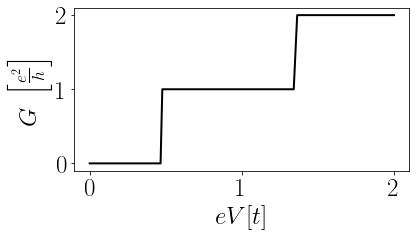

In [8]:
data = learner.data
phis_0, Gs_0_QH = map(list, zip(*sorted(data.items())))

wire.plot_cond(phis_0, Gs_0_QH, ylim =[-0.1, 2.1])

**Figura 6:** Condutividade Hall de um nanofio. Conforme aumentamos a energia dos elétrons incidentes, a condutância muda, sendo sempre um múltiplo inteiro de $e^2 / h$.

E o que acontece quando adicionamos disordem? Exceto pelos pontos muito próximos de onde a condutância muda de valor, **praticamente nada!!!**

In [9]:
learner = Learner1D(
    partial(wire.compute_conductance, sys = sys, phi = 0.5, U_0 = 1.),
    bounds=(0., 2.)
)
runner = Runner(learner, goal=lambda l: l.npoints > 300)
runner.live_info()

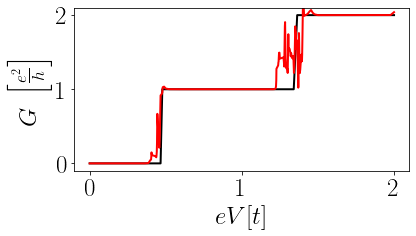

In [10]:
data = learner.data
phis, Gs_QH = map(list, zip(*sorted(data.items())))
wire.plot_cond(par = phis_0, Gs = Gs_0_QH, par2 = phis, Gs2 = Gs_QH, ylim =[-0.1, 2.1])

**Figura 7:** Condutividade Hall de um nanofio sem (preto) e com (vermelho) desordem. É possível observar que os efeitos de desordem só aparecem muito próximos das transições dos valores da condutividade Hall, e permanece praticamente inalterado longe das transições.

Qual a razão disso acontecer?

### Uma abordagem semiclássica

Conforme discutimos acima, em campos muito altos, os elétrons percorrem as órbitas ciclotrônicas. Sendo assim, os elétrons que estão dentro do material não saem do lugar: ficam indefinidamente percorrendo essas órbitas, do mesmo jeito que elétrons ficam circulando em torno dos átomos em um material isolante. Por outro lado, os elétrons muito próximos das bordas da amostra não são capazes de fazer um loop completo, e "quicam" ao longo das bordas (isso não acontece em qualquer isolante, só em uma classe muito específica), criando canais eletrônicos, iguais aos de um nanofio.

![Scheme](./QH_scheme.png)

**Figura 8:** Esquema da abordagem semiclássica para o efeito Hall. No interior do material, as órbitas ciclotrônicas fechadas faz com que o comportamento seja semelhante ao de um isolante. Nas bordas, a impossibilidade de completar uma órbita fechada cria canais eletrônicos unidimensionais.

E o que acontece quando incluímos desordem?

Repare, contudo, que o campo magnético força os elétrons que estão em uma das bordas a se moverem em uma única direção. Portanto, mesmo que o material tenha defeitos, a direção de propagação não vai mudar, e continuamos observando o mesmo valor de condutividade. De fato, esse valor é tão preciso que [será usado como padrão para o sistema internacional de unidades](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.122.200001)!

![Impurity](./impurity_QH.png)

**Figura 9:** Efeitos de impurezas na propagação dos canais eletrônicos das bordas de um sistema no efeito Hall quântico. A direção de movimento nas órbitas ciclotrônicas faz com que impurezas sejam incapazes de parar os elétrons ou fazê-los moverem na direção contrária.

E o que faz o número de canais eletrônicos variar? Ou seja, o que faz a condutância mudar de 0 para 1 e depois para 2, no gráfico? A analogia com elétrons circulando ao redor do núcleo de um átomo funciona muito bem. Lembra que um átomo tem várias camadas eletrônicas, com diferentes energias? Aqui acontece algo muito parecido: as órbitas ciclotrônicas também formam diversas camadas, e cada uma delas gera uma borda condutora. Conforme aumentamos a energia dos elétrons, eles podem ocupar mais e mais camadas, e, consequentemente, o número de canais eletrônicos aumenta. Segundo a fórmula de Landauer, a condutância também aumenta.